In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-and-future-careers-synthetic-survey-data/respondents_ai_impact_synthetic.csv


In [3]:
df = pd.read_csv('/kaggle/input/ai-and-future-careers-synthetic-survey-data/respondents_ai_impact_synthetic.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Respondent_ID,Age,Current_Status,Field_Of_Study_Work,AI_Impact_On_Field,AI_Usage_During_College,Most_Used_AI_Tools_College,Purpose_Of_AI_College,AI_Helpfulness_Academic_Tasks,AI_Dependence_College,...,Job_Preference_AI_Reliance,AI_Job_Reduction_Perception,Readiness_For_AI_Industry,Willingness_To_Learn_AI,Workplace_AI_Adoption,AI_Work_Efficiency_Increase,AI_Replacing_Human_Work,View_On_AI_In_Workplace,Need_To_Upskill_AI,Job_Survival_Next_10_Years
0,1,22,Fresh Graduate,Information Technology / Computer Science,"Yes, significantly impacted",Very often,"ChatGPT, Github Copilot / Codeium","Helping understand material, Doing assignments...",5.0,Yes,...,Relies on AI,No,5 - Very ready,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,Student,Economics & Management,"Yes, but only partially",Sometimes,"ChatGPT, Google Bard / Gemini","Helping understand material, Searching academi...",3.0,No,...,"No preference, as long as it aligns with my sk...",No,3,Maybe,NaN,NaN,NaN,NaN,NaN,NaN
2,3,35,Professional / Already working,Healthcare,Not impacted,NaN,NaN,NaN,NaN,NaN,...,Does not rely on AI,No,2,No,No,2,No,Neutral,No,Yes
3,4,25,Fresh Graduate,Industrial Engineering / Information Systems,"Yes, significantly impacted",Often,"Microsoft Copilot, ChatGPT","Doing assignments, Designing or creating content",4.0,Yes,...,Relies on AI,No,4,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,5,19,Student,Information Technology / Computer Science,"Yes, significantly impacted",Sometimes,"Google Bard / Gemini, Midjourney","Helping understand material, Coding/programming",4.0,No,...,Relies on AI,No,4,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df['AI_Helpfulness_Academic_Tasks'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Respondent_ID                     100 non-null    int64  
 1   Age                               100 non-null    int64  
 2   Current_Status                    100 non-null    object 
 3   Field_Of_Study_Work               100 non-null    object 
 4   AI_Impact_On_Field                100 non-null    object 
 5   AI_Usage_During_College           56 non-null     object 
 6   Most_Used_AI_Tools_College        43 non-null     object 
 7   Purpose_Of_AI_College             43 non-null     object 
 8   AI_Helpfulness_Academic_Tasks     56 non-null     float64
 9   AI_Dependence_College             56 non-null     object 
 10  AI_Creativity_Productivity_Boost  56 non-null     float64
 11  AI_Influence_Career_Choice        100 non-null    object 
 12  AI_Job_Op

AI_Helpfulness_Academic_Tasks
5.0    13
3.0    13
1.0    13
4.0    10
2.0     7
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


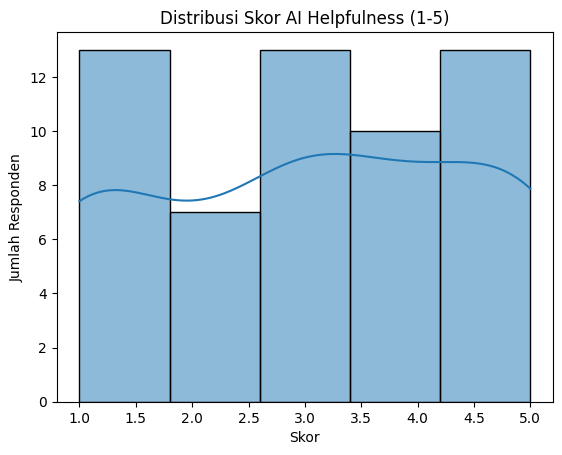

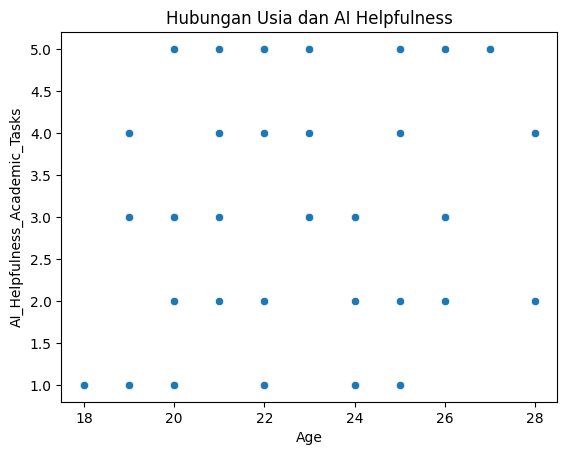

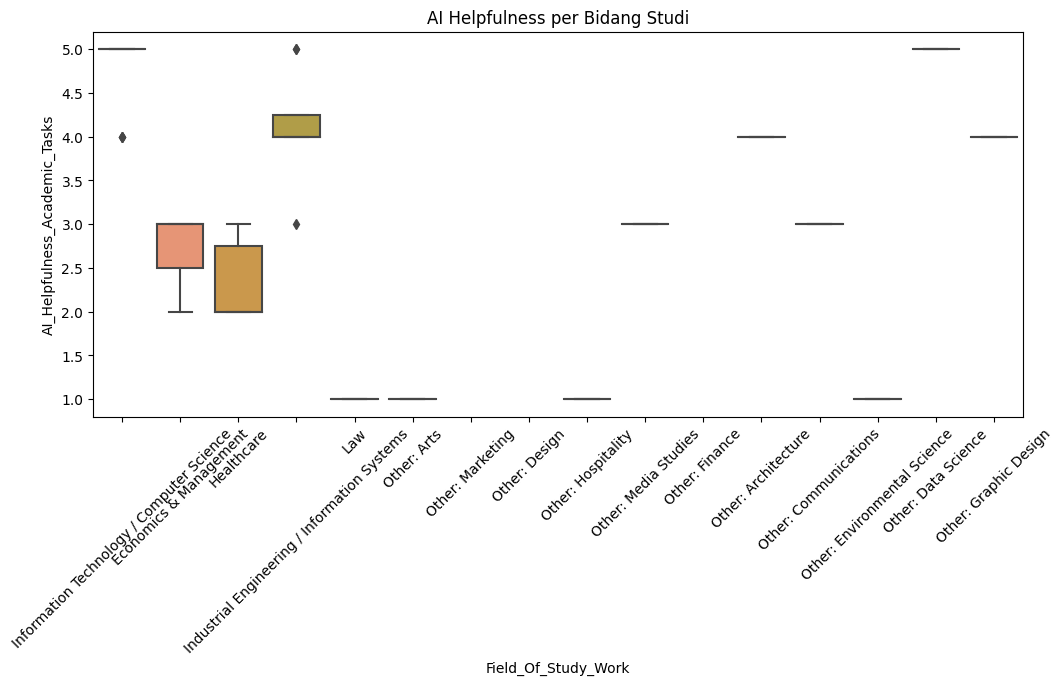

In [5]:
# Distribusi Target
sns.histplot(df['AI_Helpfulness_Academic_Tasks'], bins=5,kde=True)
plt.title("Distribusi Skor AI Helpfulness (1-5)")
plt.xlabel("Skor")
plt.ylabel("Jumlah Responden")
plt.show()

# Hubungan antara Age dan Helpfulness
sns.scatterplot(data=df, x='Age', y='AI_Helpfulness_Academic_Tasks')
plt.title("Hubungan Usia dan AI Helpfulness")
plt.show()

# Helpfulness per Field of Study
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Field_Of_Study_Work', y='AI_Helpfulness_Academic_Tasks')
plt.xticks(rotation=45)
plt.title("AI Helpfulness per Bidang Studi")
plt.show()

In [6]:
# Fitur awal yang dipilih
selected_columns = [
    'Age',
    'Current_Status',
    'Field_Of_Study_Work',
    'AI_Impact_On_Field',
    'AI_Influence_Career_Choice',
    'Job_Preference_AI_Reliance',
    'Readiness_For_AI_Industry',
    'Willingness_To_Learn_AI',
    'AI_Job_Opportunity_Increase',
    'AI_Helpfulness_Academic_Tasks'  # target
]

df_selected = df[selected_columns].copy()

In [7]:
# Hapus baris dengan target kosong
df_selected = df_selected.dropna(subset=['AI_Helpfulness_Academic_Tasks'])

In [8]:
# Encoding semua kolom kategorikal
label_encoders = {}
for col in df_selected.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

In [9]:
df_selected.head()

,Age,Current_Status,Field_Of_Study_Work,AI_Impact_On_Field,AI_Influence_Career_Choice,Job_Preference_AI_Reliance,Readiness_For_AI_Industry,Willingness_To_Learn_AI,AI_Job_Opportunity_Increase,AI_Helpfulness_Academic_Tasks
0,22,0,3,2,1,2,4,2,5,5.0
1,20,1,0,1,0,1,2,0,3,3.0
3,25,0,2,2,1,2,3,2,4,4.0
4,19,1,3,2,1,2,3,2,4,4.0
6,21,1,3,2,1,2,4,2,5,5.0


# **Model Training – Linear Regression**

In [10]:
# Import tools untuk training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Pisahkan fitur (X) dan target (y)
X = df_selected.drop('AI_Helpfulness_Academic_Tasks', axis=1)
y = df_selected['AI_Helpfulness_Academic_Tasks']

# 2. Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Inisialisasi dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediksi dan evaluasi
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 Hasil Evaluasi Model Linear Regression:")
print(f"📉 MSE  : {mse:.4f}")
print(f"📊 RMSE : {rmse:.4f}")
print(f"🎯 R²   : {r2:.4f}")


🔍 Hasil Evaluasi Model Linear Regression:
📉 MSE  : 0.0600
📊 RMSE : 0.2449
🎯 R²   : 0.9645


 **Interpretasi:**
* 📉 MSE: 0.0600 → galat prediksi rata-rata sangat kecil.

* 📊 RMSE: 0.2449 → akar dari MSE, artinya rata-rata kesalahan prediksi hanya ~0.24 poin (skala 1–5).

* 🎯 R² Score: 0.9645 → model menjelaskan 96.45% variansi dari target. Ini indikasi model sangat cocok dengan data.

# **Training Random Forest Regressor**

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi dan training model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi
rf_pred = rf_model.predict(X_test)

# Metrik evaluasi
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("🌲 Random Forest Regressor")
print(f"MSE  : {rf_mse:.4f}")
print(f"RMSE : {rf_rmse:.4f}")
print(f"R²   : {rf_r2:.4f}")

🌲 Random Forest Regressor
MSE  : 0.0546
RMSE : 0.2336
R²   : 0.9677


# **Kesimpulan**
Model Random Forest Regressor yang kamu buat memiliki performa sangat baik karena:
Kesalahan prediksi (MSE dan RMSE) sangat kecil,
Model mampu menjelaskan hampir semua variasi data (R² mendekati 1).

# **Training XGBoost Regressor**

In [12]:
from xgboost import XGBRegressor

# Inisialisasi dan training model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi dan evaluasi
xgb_pred = xgb_model.predict(X_test)

# Metrik evaluasi
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

print("⚡ XGBoost Regressor")
print(f"MSE  : {xgb_mse:.4f}")
print(f"RMSE : {xgb_rmse:.4f}")
print(f"R²   : {xgb_r2:.4f}")

⚡ XGBoost Regressor
MSE  : 0.0838
RMSE : 0.2895
R²   : 0.9503


| 🔍 **Model**          | 📉 **MSE**     | 📊 **RMSE**   | 🎯 **R² Score** |
| --------------------- | ------------   | ------------   | --------------- |
| **Linear Regression** | 0.0600         | 0.2449         | 0.9645          |
| **Random Forest**     | ✅ **0.0546**  | ✅ **0.2336** | ✅ **0.9677**    |
| **XGBoost**           | 0.0838         | 0.2895         | 0.9503          |

**Kesimpulan Sementara:**
* Random Forest Regressor adalah model terbaik saat ini dengan R² tertinggi dan RMSE terkecil.
* XGBoost sedikit overfit/kurang pas di dataset kecil ini, kemungkinan karena default setting-nya.
* Linear Regression cukup bagus, jadi bisa tetap dijadikan baseline sederhana.

# **Feature Importance**

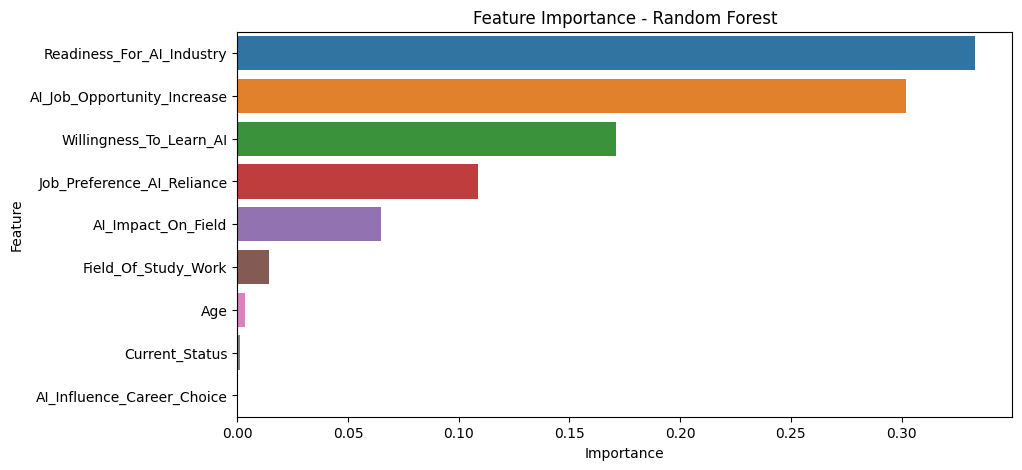

In [13]:
import matplotlib.pyplot as plt

# Buat DataFrame untuk importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=rf_importance, x='Importance', y='Feature')
plt.title("Feature Importance - Random Forest")
plt.show()

# **Model Tuning (Hyperparameter Tuning) – *Random Forest***

In [14]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model dasar
rf = RandomForestRegressor(random_state=42)

# Definisi grid parameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Grid search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Jalankan grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [15]:
print("🔥 Best Parameters Found:")
print(grid_search.best_params_)

# Evaluasi model terbaik di test set
best_rf = grid_search.best_estimator_
best_pred = best_rf.predict(X_test)

best_mse = mean_squared_error(y_test, best_pred)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, best_pred)

print("\n🚀 Best Tuned Random Forest Performance:")
print(f"MSE  : {best_mse:.4f}")
print(f"RMSE : {best_rmse:.4f}")
print(f"R²   : {best_r2:.4f}")

🔥 Best Parameters Found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}

🚀 Best Tuned Random Forest Performance:
MSE  : 0.0475
RMSE : 0.2179
R²   : 0.9719


| Model                     | MSE          | RMSE         | R² Score     |
| ------------------------- | ------------ | ------------ | ------------ |
| Linear Regression         | 0.0600       | 0.2449       | 0.9645       |
| Random Forest (default)   | 0.0546       | 0.2336       | 0.9677       |
| **Random Forest (tuned)** | ✅ **0.0475** | ✅ **0.2179** | ✅ **0.9719** |

**Kesimpulan:**
* Setelah tuning, model Random Forest semakin akurat dan lebih stabil.
* R² mendekati 1 = sangat cocok memodelkan hubungan antara input dan persepsi “helpfulness AI”.
* Ini model yang sangat layak untuk deployment atau presentasi tugas akhir.

In [21]:
# Model sebelum tuning
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train, y_train)
rf_pred_default = rf_default.predict(X_test)

# Model setelah tuning
rf_tuned = best_rf  # sudah dihasilkan dari GridSearchCV
rf_pred_tuned = rf_tuned.predict(X_test)


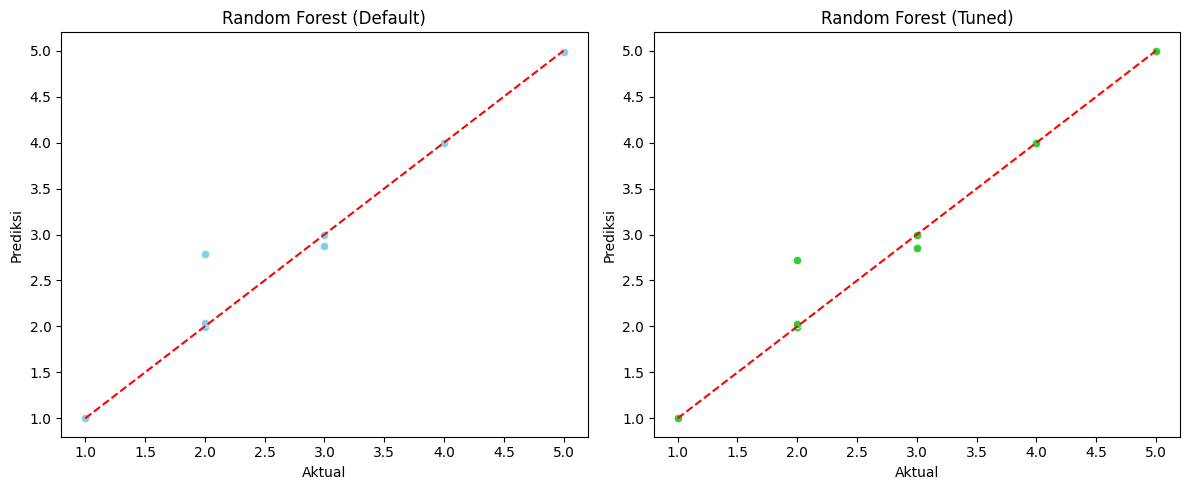

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Sebelum tuning
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=rf_pred_default, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest (Default)')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')

# Setelah tuning
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=rf_pred_tuned, color='limegreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest (Tuned)')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')

plt.tight_layout()
plt.show()


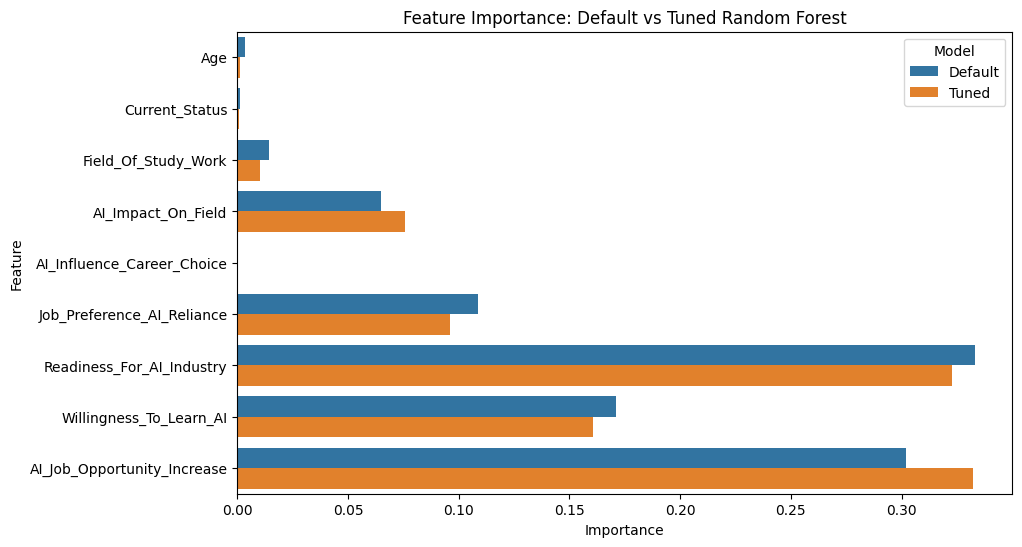

In [24]:
# Bandingkan feature importance
import pandas as pd

df_imp_default = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_default.feature_importances_,
    'Model': 'Default'
})

df_imp_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_tuned.feature_importances_,
    'Model': 'Tuned'
})

df_importance_all = pd.concat([df_imp_default, df_imp_tuned])

plt.figure(figsize=(10,6))
sns.barplot(data=df_importance_all, x='Importance', y='Feature', hue='Model')
plt.title('Feature Importance: Default vs Tuned Random Forest')
plt.show()


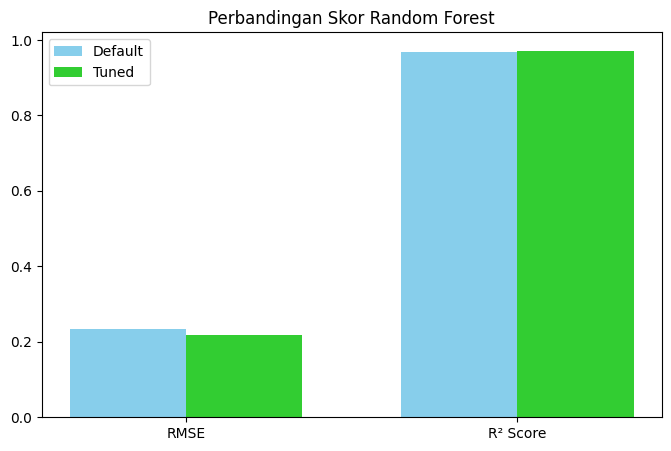

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hitung metrik
rmse_default = np.sqrt(mean_squared_error(y_test, rf_pred_default))
r2_default = r2_score(y_test, rf_pred_default)

rmse_tuned = np.sqrt(mean_squared_error(y_test, rf_pred_tuned))
r2_tuned = r2_score(y_test, rf_pred_tuned)

# Bar chart
labels = ['RMSE', 'R² Score']
default_scores = [rmse_default, r2_default]
tuned_scores = [rmse_tuned, r2_tuned]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, default_scores, width, label='Default', color='skyblue')
plt.bar(x + width/2, tuned_scores, width, label='Tuned', color='limegreen')
plt.xticks(x, labels)
plt.title('Perbandingan Skor Random Forest')
plt.legend()
plt.show()
